> # 220901
- ## pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
#1,2
df_corona = pd.read_csv("../csv/corona.csv")
df_corona.drop(["Unnamed: 0"], axis=1, inplace=True)
df_corona_copy = df_corona

In [3]:
#3
df_corona_copy.isna().sum()

createDt        0
deathCnt        0
decideCnt       0
seq             0
stateDt         0
stateTime       0
updateDt        3
accExamCnt    128
accDefRate    197
dtype: int64

In [4]:
#4
df_corona_copy.columns = ['등록일시', '사망자', '확진자', '게시글번호', '기준일', '기준시간', '수정일시', '누적의심자', '누적확진률']

In [5]:
# #5
# df_corona_copy.dropna(axis=1, inplace=True)
# # df_corona_copy.isna().sum() #확인

In [6]:
#6
df_corona_copy.sort_values(["등록일시"], ascending=True, inplace=True)

In [7]:
#7
df_corona_copy.reset_index(drop=True, inplace=True)

In [8]:
#8. 등록일시 데이터의 형태를 datatime으로 변경 시분초
# import datetime
df_corona_copy["등록일시"] = pd.to_datetime(df_corona_copy["등록일시"], format="%Y-%m-%d %H:%M:%S")

> ## ㄴ 일일확진자,사망자수 구하기

In [9]:
"""일일누적확진자_파생변수"""
df_corona_copy

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000
...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN


In [10]:
# # df_corona_copy.index.start
# # df_corona_copy.index.stop
# # df_corona_copy["확진자"][1]
# df_corona_copy["당일확진자수"] = df_corona_copy["확진자"]

# for i in range(df_corona_copy.index.start+1, df_corona_copy.index.stop-1, 1):
#     df_corona_copy["당일확진자수"][i] = df_corona_copy["확진자"][i] - df_corona_copy["확진자"][i-1]

## - shift
- 한 행씩 뒤로 미룬다. / 행이동.
- shift(n) -> n을 공란으로 두게 되면 기본값이 1
- n 값만큼 인덱스를 이동하여 그 행의 값을 가지게 된다.

## - diff()
- 앞뒤셀의 차이를 출력
- 한 객체 내에서 열과 열 / 행과 행 차이를 출력

In [11]:
df_corona_copy["일일확진자"] = df_corona_copy["확진자"] - df_corona_copy["확진자"].shift()
df_corona_copy["일일사망자"] = df_corona_copy["사망자"].diff()
# 0행이 NaN인 이유는 -1행과의 차이를 구하기에 결측치가 된다.

In [12]:
df_corona_copy

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10 00:00:00.000,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,NaN,NaN
1,2020-03-11 00:00:00.000,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0
2,2020-03-12 00:00:00.000,66,7869,53,20200312,00:00,2021-10-07 10:30:51.51,234998.0,3.621744,114.0,6.0
3,2020-03-13 00:00:00.000,67,7979,54,20200313,00:00,2021-10-07 10:30:51.51,248647.0,3.458499,110.0,1.0
4,2020-03-14 00:00:00.000,72,8086,55,20200314,00:00,2021-10-07 10:30:51.51,261335.0,3.318000,107.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
815,2022-06-04 08:56:49.219,24238,18153814,900,20220604,00:00,2022-06-08 09:11:26.303,NaN,NaN,12039.0,9.0
816,2022-06-05 08:53:19.426,24258,18163648,901,20220605,00:00,2022-06-08 09:11:04.758,NaN,NaN,9834.0,20.0
817,2022-06-06 09:00:06.734,24279,18168670,902,20220606,00:00,2022-06-08 09:10:50.441,NaN,NaN,5022.0,21.0
818,2022-06-07 09:09:00.897,24299,18174842,903,20220607,00:00,2022-06-08 09:10:36.846,NaN,NaN,6172.0,20.0


> ## 결측치를 채우는 함수
- fillna(결측치에 들어갈 값)
- dropna() : 결측치 삭제
---

In [13]:
df_corona_copy["일일확진자"] = df_corona_copy["일일확진자"].fillna(0)
#결측치를 0으로 바꿈

> - fillna(옵션)
- method 속성 -> ffill, bfill
- fill:채우다, f:front, b:back
- ffill -> 전의 값으로 채운다
- bfill -> 후의 값으로 채운다
<br><br>
- 누적의심자 컬럼의 값들을 fillna(method = 'bfill')

In [14]:
"""ffill은 전의 값으로 대체되어 결측치 전체가 다 바뀜"""
df_corona_copy["일일확진자"].fillna(method="ffill")
"""그러나 bfill의 경우 결측치가 2개 이상 연속일 때 결측치가 그대로 남게될 가능성 존재"""
# df_corona_copy["일일확진자"].fillna(method="bfill")

'그러나 bfill의 경우 결측치가 2개 이상 연속일 때 결측치가 그대로 남게될 가능성 존재'

In [15]:
df_corona_copy["누적확진률"].fillna(df_corona_copy["누적확진률"].mean())

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

> ## filter기능
- query('조건')

In [37]:
## filter기능
## query
"""확진자수가 음수가 될 수 없는데 존재. 이상값임."""
df_corona_copy.query("일일확진자 < 0 ")
# df_corona_copy.query("일일확진자 < 0 ")["일일확진자"] = np.nan
# df_corona_copy.dropna(axis=0)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L,요일
446,2021-05-30,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0,Low,일


In [17]:
## 인덱스 333부터 448까지의 데이터를 출력하여 확인
df_corona_copy.loc[444:448,:]

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
444,2021-05-29,1951,139427,496,20210529,00:00,2021-10-07 10:30:51.51,9733588.0,1.450884,533.0,5.0
445,2021-05-30,1959,140337,498,20210531,00:00,2021-10-14 13:48:56.821,9761156.0,1.456805,910.0,8.0
446,2021-05-30,1957,139907,497,20210530,00:00,2021-10-07 10:30:51.51,9747612.0,1.454166,-430.0,-2.0
447,2021-06-01,1963,140796,499,20210601,00:00,2021-10-07 10:30:51.51,9798400.0,1.455890,889.0,6.0
448,2021-06-02,1965,141473,500,20210602,00:00,2021-10-07 10:30:51.51,9834348.0,1.457668,677.0,2.0


> ## lambda 함수 파생변수
- 일반 def 함수 파생변수
- 누적확진률 컬럼에서 누적환진률의 평균보다 높으면 High 낮으면 Low

In [18]:
df_corona_copy["누적확진률"].fillna(df_corona_copy["누적확진률"].mean(), inplace=True)

In [19]:
df_corona_copy["누적확진률"]

0      3.919308
1      3.804175
2      3.621744
3      3.458499
4      3.318000
         ...   
815    1.556435
816    1.556435
817    1.556435
818    1.556435
819    1.556435
Name: 누적확진률, Length: 820, dtype: float64

1 ) apply로 HL을 만들어보자
- apply() : (전체에) 적용한다.
- labda : x를 대입해서 반환해주는 함수

In [20]:
a=df_corona
df_corona.head(2)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0


In [21]:
## lambda 매개변수 : 표현식
#l
df_corona_copy["H/L"] = df_corona_copy["누적확진률"].apply(
    lambda x : "High" if(x>df_corona_copy["누적확진률"].mean()) else "Low"
    )

In [22]:
df_corona_copy.head(2)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High


In [23]:
df_corona.head(2)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High


In [24]:
a.head(2)

,등록일시,사망자,확진자,게시글번호,기준일,기준시간,수정일시,누적의심자,누적확진률,일일확진자,일일사망자,H/L
0,2020-03-10,54,7513,51,20200310,00:00,2021-10-07 10:30:51.51,210144.0,3.919308,0.0,NaN,High
1,2020-03-11,60,7755,52,20200311,00:00,2021-10-07 10:30:51.51,222395.0,3.804175,242.0,6.0,High


In [25]:
df_corona_copy["H/L"].value_counts()

Low     618
High    202
Name: H/L, dtype: int64

2 ) apply() 일반함수로 만들어보자
- 함수생성
- 매개변수 1개 매개변수의 값이 누적확진률의 평균보다 높으면 High return
- 조건식이 거짓이면 Low return

In [26]:
def HL(x):
    if x > df_corona_copy["누적확진률"].mean():
        return "High"
    else:
        return "Low"

In [27]:
df_corona_copy["누적확진률"].apply(HL)
# df_corona_copy["누적확진률"].apply(HL).value_counts()

#apply()를 쓰면 해당 데이터가 하나씩 인자로 ()안으로 들어간다.

0      High
1      High
2      High
3      High
4      High
       ... 
815     Low
816     Low
817     Low
818     Low
819     Low
Name: 누적확진률, Length: 820, dtype: object

## 요일이라는 파생변수 생성
- 등록일시 datetime 변경
- datetime 기준으로 요일을 출력
---

In [28]:
df_corona_copy["등록일시"].head(2)

0   2020-03-10
1   2020-03-11
Name: 등록일시, dtype: datetime64[ns]

In [29]:
df_corona_copy["등록일시"] = pd.to_datetime(df_corona_copy["등록일시"])
# 이미 자료가 시계열자료형태로 만들어져 있기에 굳이 포멧지정을 안해도 된다.(그러나 원본 형식은 str)

- dt.weekday를 사용하면 요일이 숫자로 표시
- 0(월) --- 6(일)

In [30]:
df_corona_copy["요일"] = df_corona_copy["등록일시"].dt.weekday
df_corona_copy["요일"]

0      1
1      2
2      3
3      4
4      5
      ..
815    5
816    6
817    0
818    1
819    2
Name: 요일, Length: 820, dtype: int64

- apply함수를 이용해서 숫자로 표시되어 있는 요일 컬럼을 한글로 변경

In [31]:
def change_week(x):
    if x == 0:
        return "월"
    elif x == 1:
        return "화"
    elif x == 2:
        return "수"
    elif x == 3:
        return "목"
    elif x == 4:
        return "금"
    elif x == 5:
        return "토"
    elif x == 6:
        return "일"
    else :
        return "?"

In [32]:
df_corona_copy["요일"]= df_corona_copy["요일"].apply(change_week)

In [33]:
"""lambda는 간단하게 사용할 때만! elif가 없어 불편"""
# df_corona_copy["요일"].apply(lambda x : "월" if x == 0 else "화" if x == 1 else "수")

'lambda는 간단하게 사용할 때만! elif가 없어 불편'

## 요일별 코로나의 확진자수의 평균이 어떻게 표기가 되는가
- 그래프를 이용해서 출력
- Groupby를 사용해서 한번에 구한다!! 직접x
---

In [34]:
"""요일별로 데이터를 묶어서 요일별 평균 구함"""
week_corona = df_corona_copy.groupby("요일").mean()
week_corona["일일확진자"]

요일
금    22542.854701
목    25776.267241
수    26994.550847
월    14862.586207
일    20625.101695
토    22555.948718
화    21787.296610
Name: 일일확진자, dtype: float64

In [35]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

In [ ]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

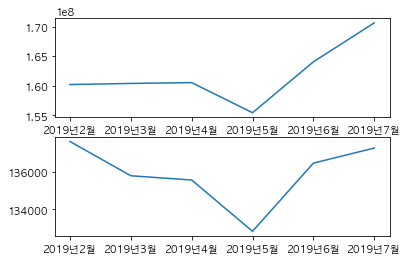

In [ ]:
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(df_ts_merge_month["total_price"])
plt.show

- x축의 값은 -> 요일
- y축의 값은 -> 평균값
  - but, plt에는 리스트로 들어가야하지만 y는 시리즈이다.
- plt는 기본적으로 한글이 지원이 안되어서 font_manager를 사용한다.

> # 맥 한글표시
> ## rc('font', family='AppleGothic')
> ## plt.rcParams['axes.unicode_minus'] = False

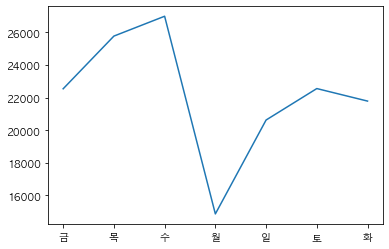

In [36]:
x= week_corona.index
y= week_corona["일일확진자"].to_list()

##윈도우
# file_path = "/Users/kyle/UBION/malgun.ttf"
# font = font_manager.FontProperties(fname = file_path).get_name()
# rc('font', family=font)

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.plot(x,y)
plt.show()